# 사이킷런 Perceptron을 이용한 간단한 분류

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
print(iris.feature_names)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values #두가지 특성만 뽑아냄. 
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)#SGDClassifier와 거의 같다고 한다.
per_clf.fit(X, y)

per_clf.predict([[2, 0.5]])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([ True])

# 사이킷런 MLPRegressor를 이용한 회귀

다층 퍼셉트론을 회귀작업에 이용해본다. 아직은 케라스나 텐서플로우를 사용하지 않고 사이킷런으로 할 것이다.

하나의 값을 예측한다면 하나의 출력뉴런만 필요하다.
다변량 회귀문제라면 출력차원마다 출력뉴런이 필요하다.

In [2]:
#각각 50개의 뉴런으로 이루어진 3개의 은닉층을 가진 신경망을 훈련시켜서 회귀 예측을 수행해본다. 
#사이킷런의 MLPRegressor는 출력층에서 활성화함수를 지원하지 않는다고 함.
#그리고 훈련과정에서 MSE 손실함수만 지원한다고 한다. 

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

datasets=fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(datasets.data, datasets.target, random_state=42)#훈련세트와 테스트세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)#훈련세트에서 검증세트 분리

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)#신경망은 경사하강법으로 훈련되기 때문에 입력 데이터를 표준화해줘야 한다. 

pipeline.fit(X_train, y_train)#훈련

valid_predict = pipeline.predict(X_valid)#검증데이터로 예측 생성

mse = mean_squared_error(y_valid, valid_predict)#검증데이터의 mse loss측정
rmse = np.sqrt(mse)#rmse로 변환
print(rmse)

0.5053326657968588


# 사이킷런 MLPClassifier를 이용한 분류

In [3]:
#iris 데이터셋을 이용할건데, 얘는 샘플 수가 너무 적어서 따로 테스트 데이터를 분리하지는 않을 것이다.
#MLPRegressor와 거의 비슷한데 크로스엔트로피 비용함수를 최소화한다는 것이 다른 점이다. 

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[10,10], random_state=42)
mlp_clf.fit(X, y)

print(mlp_clf.predict([[2, 0.5]]))
print(mlp_clf.predict_proba([[2, 0.5]]))

[ True]
[[0.46536835 0.53463165]]


/Users/barrett11357/coding/pycharm/handson_ml_--/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 케라스 Sequential API로 분류기 만들기

## 데이터셋 불러오기

우선 Keras를 이용해서 MNIST 패션 이미지 데이터셋을 불러온다.

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

데이터를 확인해보면 28*28사이즈의 배열이다. 
그리고 픽셀 강도는 실수가 아닌 0~255사이의 정수로 저장되어 있다. 

In [6]:
print(X_train.shape)
print(type(X_train))
print(X_train.dtype)

print(X_train)
print(y_train)

(55000, 28, 28)
<class 'numpy.ndarray'>
uint8
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 9 0 2]


## 정규화 및 레이블 매핑 배열 생성

픽셀강도를 간단하게 255로 나누어서 0~1의 실수로 만들어준다.

In [7]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

지금 레이블들은 단순히 숫자값이라서(당연함), 숫자값과 패션아이템 이름을 매칭한 배열을 하나 만들어준다.

In [8]:
class_names = ["T-shirt/top", "Trouser", "PulLover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 이미지 구경

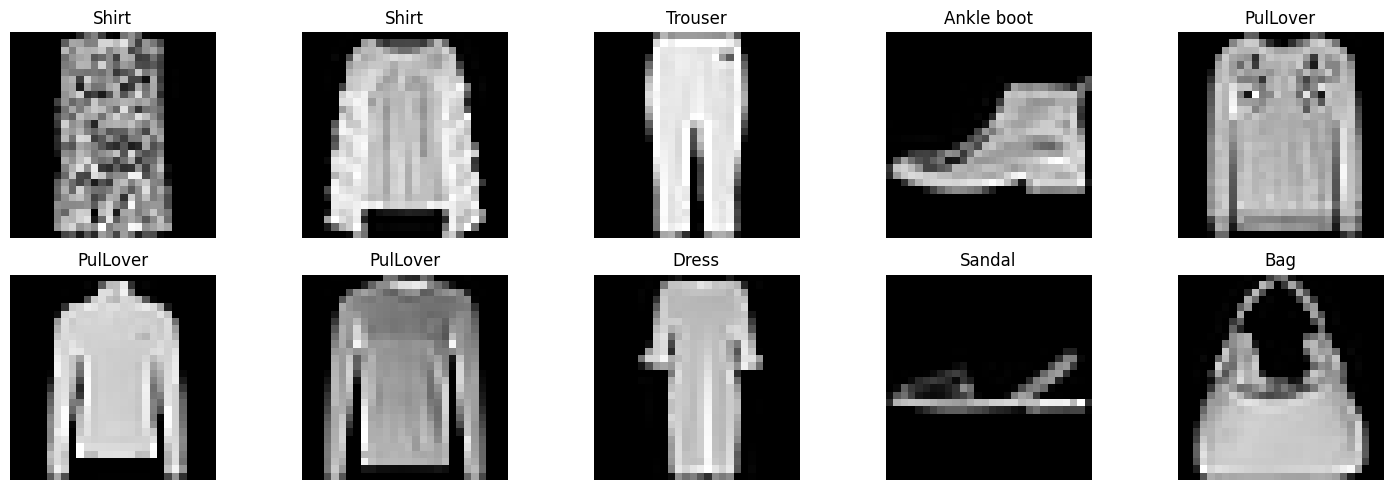

In [9]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 10
indices = np.random.choice(len(X_train), num_images, replace=False)
selected_images = X_train[indices]
selected_labels = y_train[indices]

# 그래프 크기 설정
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(class_names[selected_labels[i]])
    plt.axis('off')  # 축 숨기기

plt.tight_layout()
plt.show()


## Sequential API로 모델 만들기

이제 2개의 은닉층으로 이루어진 분류용 다층 퍼셉트론을 만들어보자.

2가지 방식으로 시퀀셜 API를 이용해서 모델을 만들고, 신경망의 정보를 얻을 수 있는 각종 메서드들을 호출해볼 것이다.

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[28,28]))#입력층
model.add(tf.keras.layers.Flatten())#각 입력 이미지를 펼쳐서 1D로 만들어준다. [50,28,28]을 입력받으면 [50,784]로 만들어준다. 
model.add(tf.keras.layers.Dense(300, activation="relu"))#300개의 뉴런을 가진 Dense층 추가, 활성화 함수로 ReLU를 사용한다. 은닉층이다.
model.add(tf.keras.layers.Dense(100, activation="relu"))#100개의 뉴런을 가진 Dense층 추가
model.add(tf.keras.layers.Dense(10, activation="softmax"))#10개의 뉴런을 가진 출력층 추가, 서로 배타적인 클래스를 가진 분류 문제이므로 소프트맥스 함수를 사용한다. 

2025-02-02 20:35:22.045187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-02-02 20:35:22.045207: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-02 20:35:22.045220: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-02 20:35:22.045235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-02 20:35:22.045245: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


위와같이 층을 하나씩 추가하지 않고, Sequential을 생성할 때 층의 리스트를 전달할 수도 있다.
이 경우 Input층을 따로 두지 않고, 첫번째 층에 input_shape를 지정할 수 있다 <- 라고 책에 나와있긴 했는데, 그냥 Input층을 추가하는게 권장된다고 경고 뜸. 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

모델의 각 층은 고유한 이름을 가진다. 케라스에서 이름을 자동을 지정해준다. 

In [12]:
#summary()메서드는 모델에 있는 모든 층을 출력한다.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

layers 속성으로 모델의 층 리스트를 쉽게 얻을 수 있다. 인덱스로 각 레이어에 접근할 수 있음.
그리고 get_layer()메서드로 층 이름으로 접근할 수도 있다.

In [13]:
print(model.layers)

hidden1 = model.layers[1]
print(hidden1.name)

#print(model.get_layer("dense_15") is hidden1) #실행시킬 때마다 이름이 달라지는 것 때문에 오류가 발생해서 주석 처리함.

[<Flatten name=flatten_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]
dense_3


층의 파라미터는 get_weights(), set_weights() 메서드로 접근해서 얻을 수 있다. 
Dense층의 경우 연결 가중치와 편향이 모두 포함되어 있다.

Dense층이 연결 가중치를 랜덤으로 초기화하고, 편향은 모두 0으로 초기화한 것을 확인할 수 있다. 

In [14]:
weights, bias = hidden1.get_weights()

print(weights)
print(bias)

[[-0.05683769 -0.01579233 -0.01155555 ...  0.06032141 -0.07343759
   0.06984785]
 [ 0.02699971  0.05938175  0.01564074 ...  0.01584936 -0.01457729
  -0.01189997]
 [ 0.02089892 -0.02706293  0.01803743 ... -0.01086836 -0.01095267
   0.03122535]
 ...
 [ 0.06185551 -0.05842051 -0.00124764 ... -0.03255505 -0.02695325
  -0.0123547 ]
 [ 0.03775376 -0.06820187 -0.05363925 ... -0.01301888  0.06235008
  -0.00795364]
 [ 0.02671932 -0.04548334  0.02740926 ...  0.01166394 -0.01003055
   0.04861077]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## 모델 컴파일

모델 컴파일 단계에서는 사용할 손실함수, 옵티마이저, 훈련과 검증단계에서 사용할 지표를 설정한다.

레이블이 정수 하나라면 "sparse_categorical_crossentropy"
레이블이 원-핫 벡터라면 "categorical_crossentropy"
이진분류나 다중 레이블 이진 분류를 수행한다면 출력층에 softmax 대신 sigmoid를 사용하고 "binary_crossentropy"손실을 사용한다. 

In [15]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

이런식으로 할 수도 있음.

In [16]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),#매개변수 learning_rate= 로 학습률을 조정할 수 있다.  
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

## 모델 훈련과 평가

In [17]:
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


왼편에 뜨는 1719 <- 이건 처리한 미니배치의 수다.
배치사이즈는 기본적으로 32이다. 훈련 세트에 55000개의 이미지가 있으므로 모델은 에포크당 1719개의 배치(32크기의 1718개, 24크기의 1개)를 처리한다.

케라스는 에포크가 끝날 때마다 검증세트를 사용해서 손실과, 다른 지표들을 계산한다. 

In [18]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15


2025-02-02 20:35:23.100862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.9802 - sparse_categorical_accuracy: 0.6682 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.8238
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5289 - sparse_categorical_accuracy: 0.8177 - val_loss: 0.4756 - val_sparse_categorical_accuracy: 0.8334
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4844 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4593 - val_sparse_categorical_accuracy: 0.8362
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4633 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.4516 - val_sparse_categorical_accuracy: 0.8392
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4507 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8396
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4423 - sparse_categorical_accuracy: 0.8483 - val_loss: 0.4438 - val_sparse_categorical_accuracy: 0.8410
Epo

fit()메서드가 반환하는 History객체에는 유용한 정보들이 담겨있다. 
훈련 파라미터(.params), 수행된 에포크 리스트(.epoch), 
그리고 에포크가 끝날 때마다 훈련, 검증 데이터의 손실, 지표를 기록한 딕셔너리(.history) <- 이걸 이용해서 학습곡선을 그릴 수 있다. 

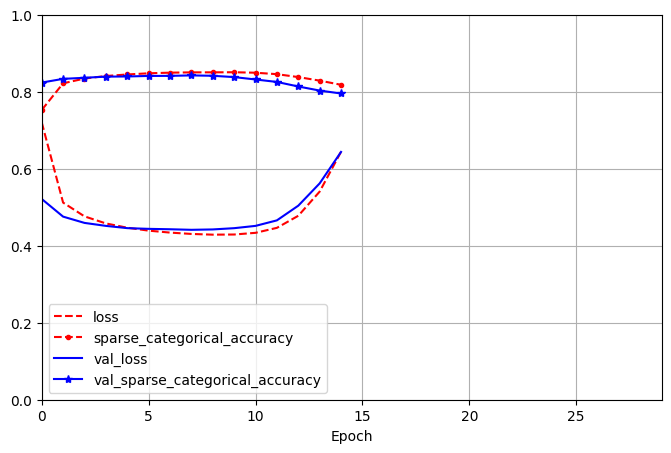

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # 추가 코드
plt.show()

evaluate()함수를 이용해서 테스트 세트로 모델의 일반환 오차를 수정할 수 있다.

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7005 - sparse_categorical_accuracy: 0.7843


[0.7033320665359497, 0.7856000065803528]

## 예측 생성하기

In [24]:
new_data = X_train[:3]

y_proba = model.predict(new_data)#예측 생성, 사이킷런의 predict_proba처럼 클래스별 확률이 출력된다. 출력층에서 소프트맥스 함수를 썼기 때문.
print(y_proba.round(3))

y_predict = y_proba.argmax(axis=-1)#axis=-1은 마지막 축을 의미한다. 각 샘플(각 행)에서 가장 큰 확률을 가지는 클래스를 반환함.
print(y_predict)

np.array(class_names)[y_predict]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.998 0.    0.    0.    0.    0.    0.002 0.    0.    0.   ]
 [0.105 0.062 0.017 0.598 0.124 0.    0.091 0.    0.001 0.   ]]
[9 0 3]


array(['Ankle boot', 'T-shirt/top', 'Dress'], dtype='<U11')